In [3]:
# Import bipartite module
from networkx.algorithms import bipartite
from networkx import NetworkXError
import networkx as nx
import matplotlib.pyplot as plt

# Load Zachary karate network 
G = nx.karate_club_graph()

try:
    # Find and print node sets
    left, right = bipartite.sets(G)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Graph is not bipartite.


In [4]:
B = nx.Graph()
B.add_edges_from([(v, (v, w)) for v, w in G.edges])
B.add_edges_from([(w, (v, w)) for v, w in G.edges])
try:
    # Find and print node sets
    left, right = bipartite.sets(B)
    print("Left nodes\n", left)
    print("\nRight nodes\n", right)
except NetworkXError as e:
    # Not an affiliation network
    print(e)

Left nodes
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

Right nodes
 {(13, 33), (29, 32), (3, 13), (5, 10), (23, 25), (0, 5), (15, 32), (2, 32), (23, 27), (0, 7), (14, 33), (1, 17), (8, 32), (31, 33), (20, 33), (23, 29), (1, 19), (2, 27), (0, 2), (5, 16), (22, 32), (1, 3), (1, 21), (1, 30), (25, 31), (3, 12), (23, 33), (27, 33), (2, 13), (24, 25), (29, 33), (14, 32), (1, 7), (3, 7), (4, 6), (31, 32), (18, 32), (20, 32), (0, 11), (2, 8), (30, 33), (8, 33), (19, 33), (26, 29), (5, 6), (1, 2), (0, 4), (0, 13), (0, 31), (2, 28), (4, 10), (0, 6), (2, 3), (1, 13), (28, 31), (24, 27), (15, 33), (26, 33), (0, 8), (0, 17), (28, 33), (8, 30), (32, 33), (0, 1), (0, 10), (2, 7), (0, 19), (30, 32), (6, 16), (24, 31), (18, 33), (0, 3), (22, 33), (23, 32), (0, 12), (2, 9), (0, 21), (9, 33)}


In [5]:
bipartite.is_bipartite(B)

True

In [17]:
# Create data directory path
from pathlib import Path

# Specify the path to your text file
txt_file = "bart txt chp 4.txt"

# Create an empty NetworkX graph
B = nx.Graph()

# Open the specified text file for reading
with open(txt_file, 'r') as f:
    # Skip the header row
    next(f)
    
    # Iterate through each row in the file
    for row in f:
        # Break row into cells
        cells = row.strip().split('\t')
        
        # Get plant species and pollinator species
        plant = cells[4].replace('_', '\n')
        pollinator = cells[8].replace('_', '\n')
        
        # Add an edge between pollinator and plant in graph B
        B.add_edge(pollinator, plant)
        
        # Set node types
        B.nodes[pollinator]["bipartite"] = 0
        B.nodes[plant]["bipartite"] = 1

# Only consider connected species
B = B.subgraph(list(nx.connected_components(B))[0])


In [18]:
# Get node sets
pollinators = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
plants = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

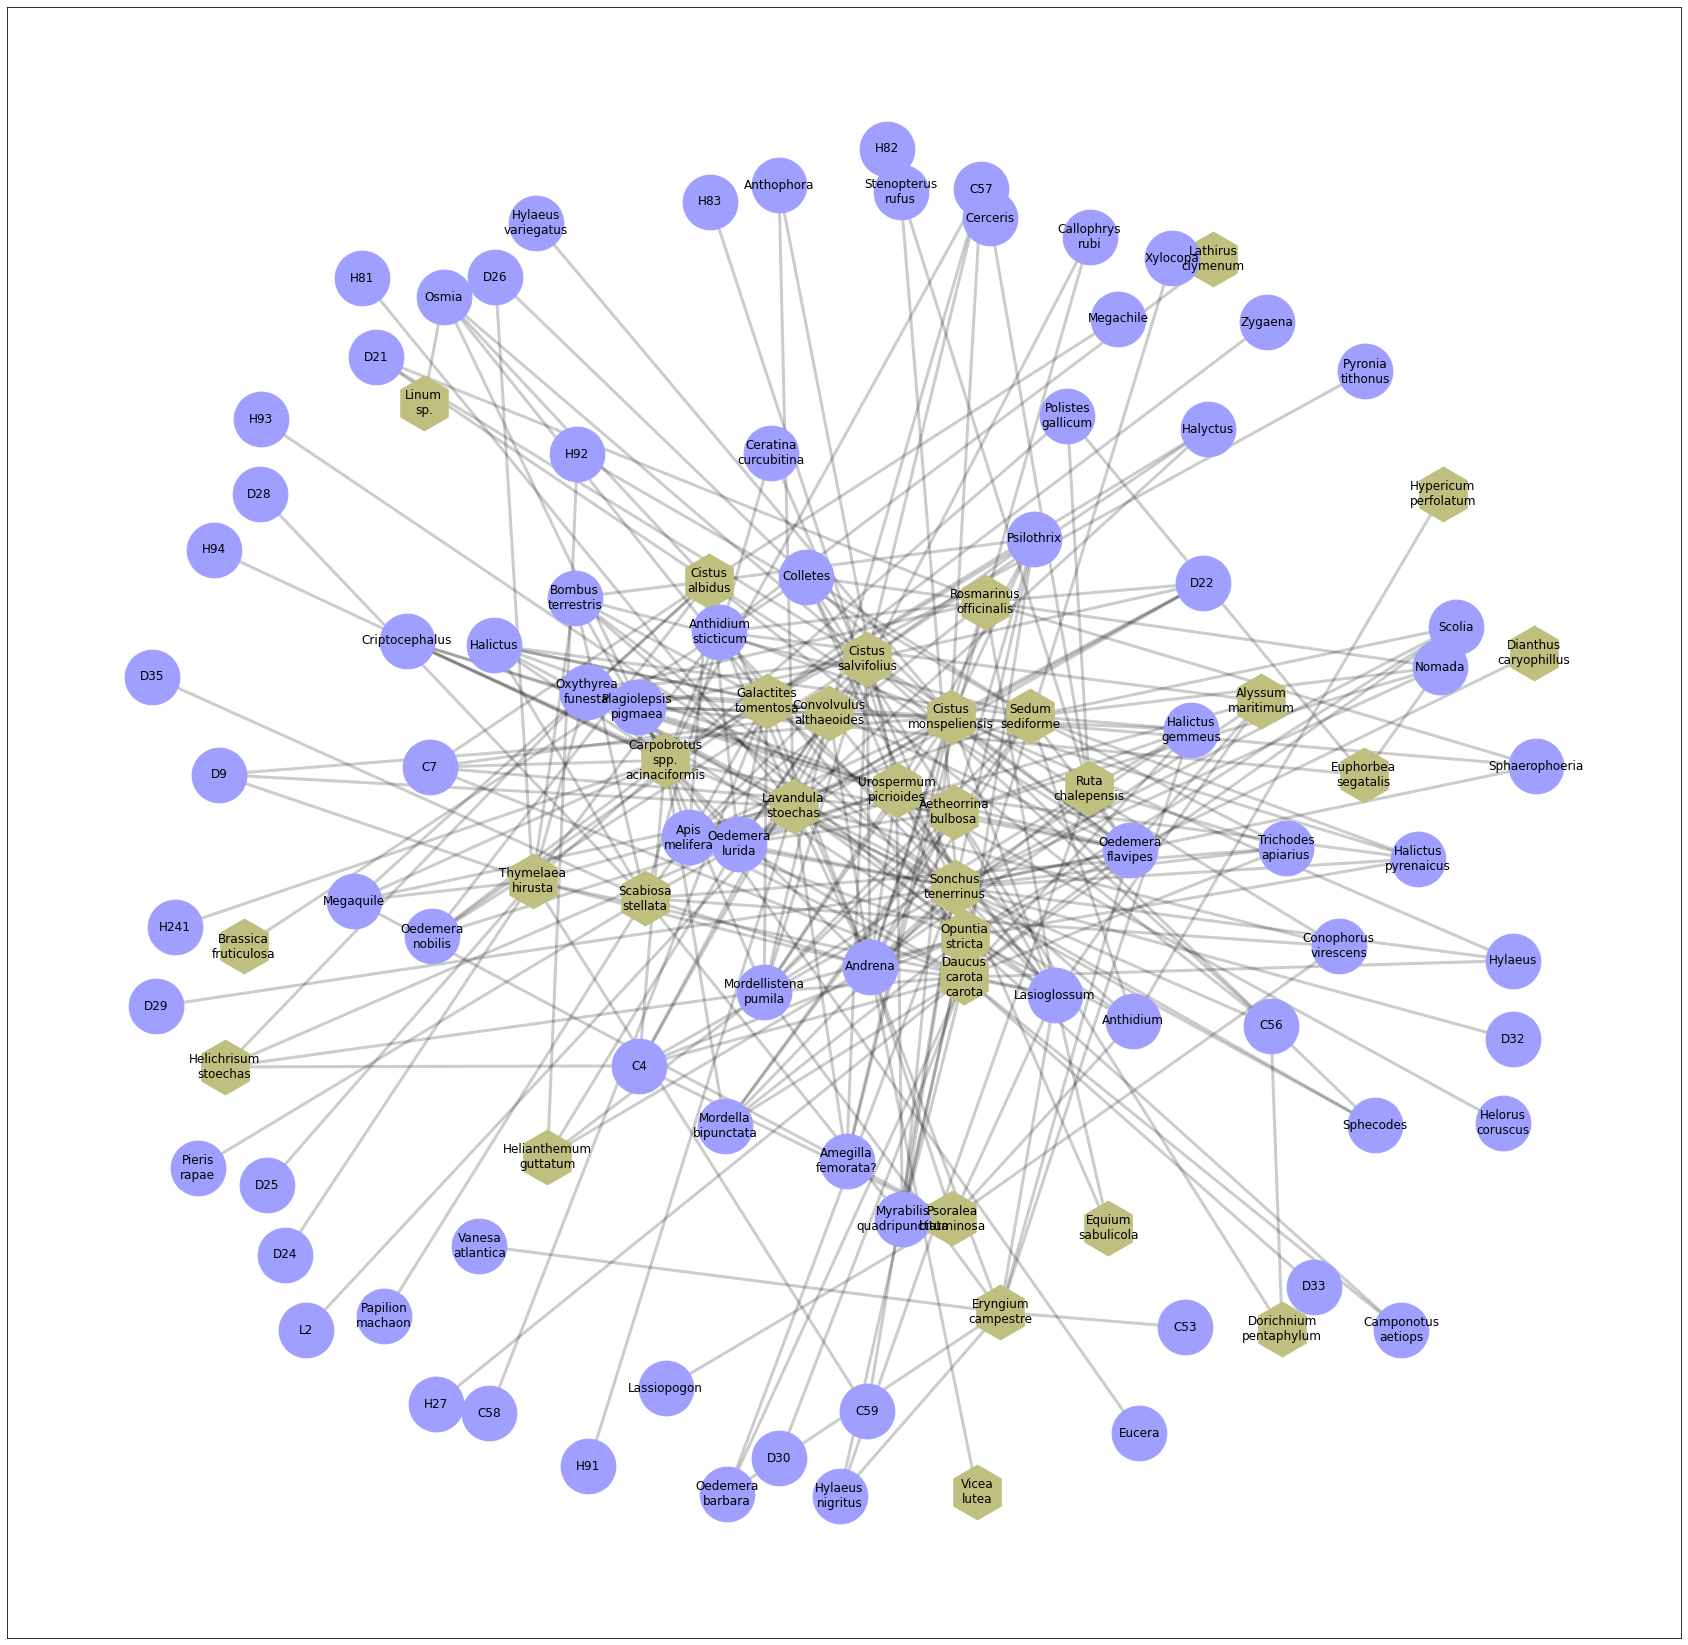

In [10]:
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(B, k=0.9)
# Draw using different shapes and colors for plant/pollinators
nx.draw_networkx_edges(B, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(B, pos, nodelist=plants, node_color="#bfbf7f", node_shape="h", node_size=3000)
nx.draw_networkx_nodes(B, pos, nodelist=pollinators, node_color="#9f9fff", node_size=3000)
nx.draw_networkx_labels(B, pos)
plt.savefig('output-4.1.png', dpi=150)

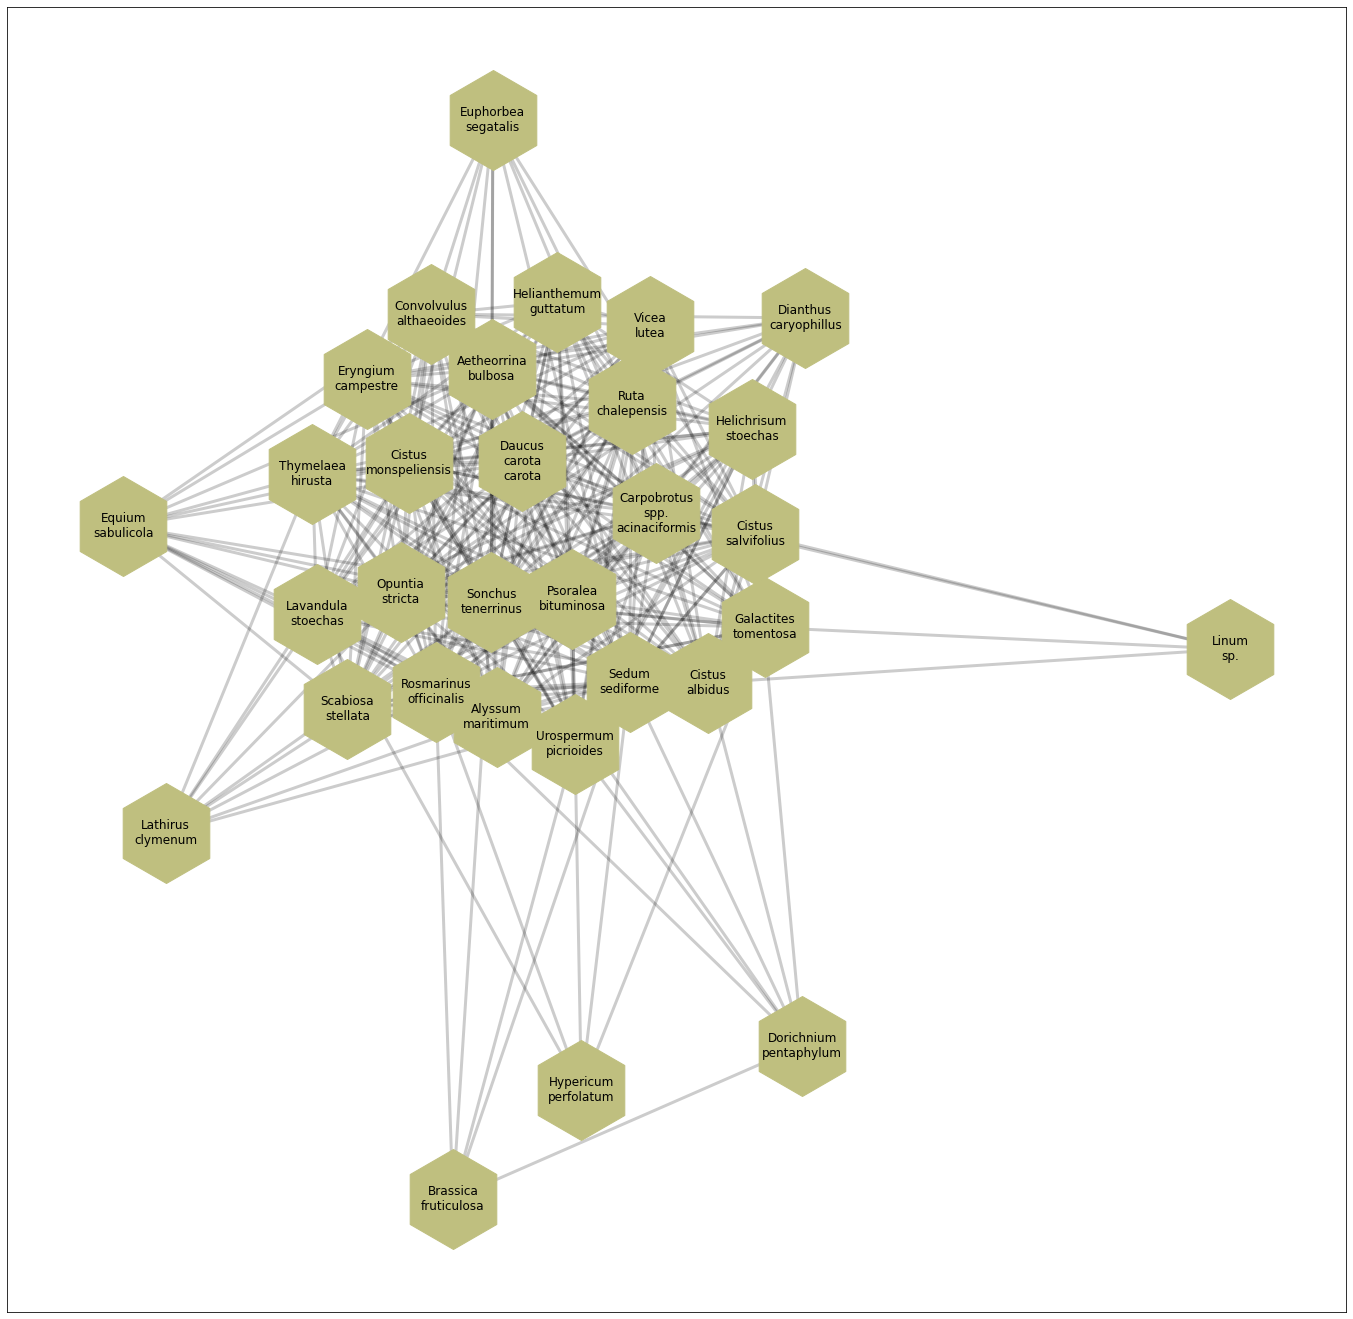

In [11]:
# Create co-affiliation network
G = bipartite.projected_graph(B, plants)
# Create figure
plt.figure(figsize=(24,24))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#bfbf7f", node_shape="h", node_size=10000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.2.png', dpi=150)

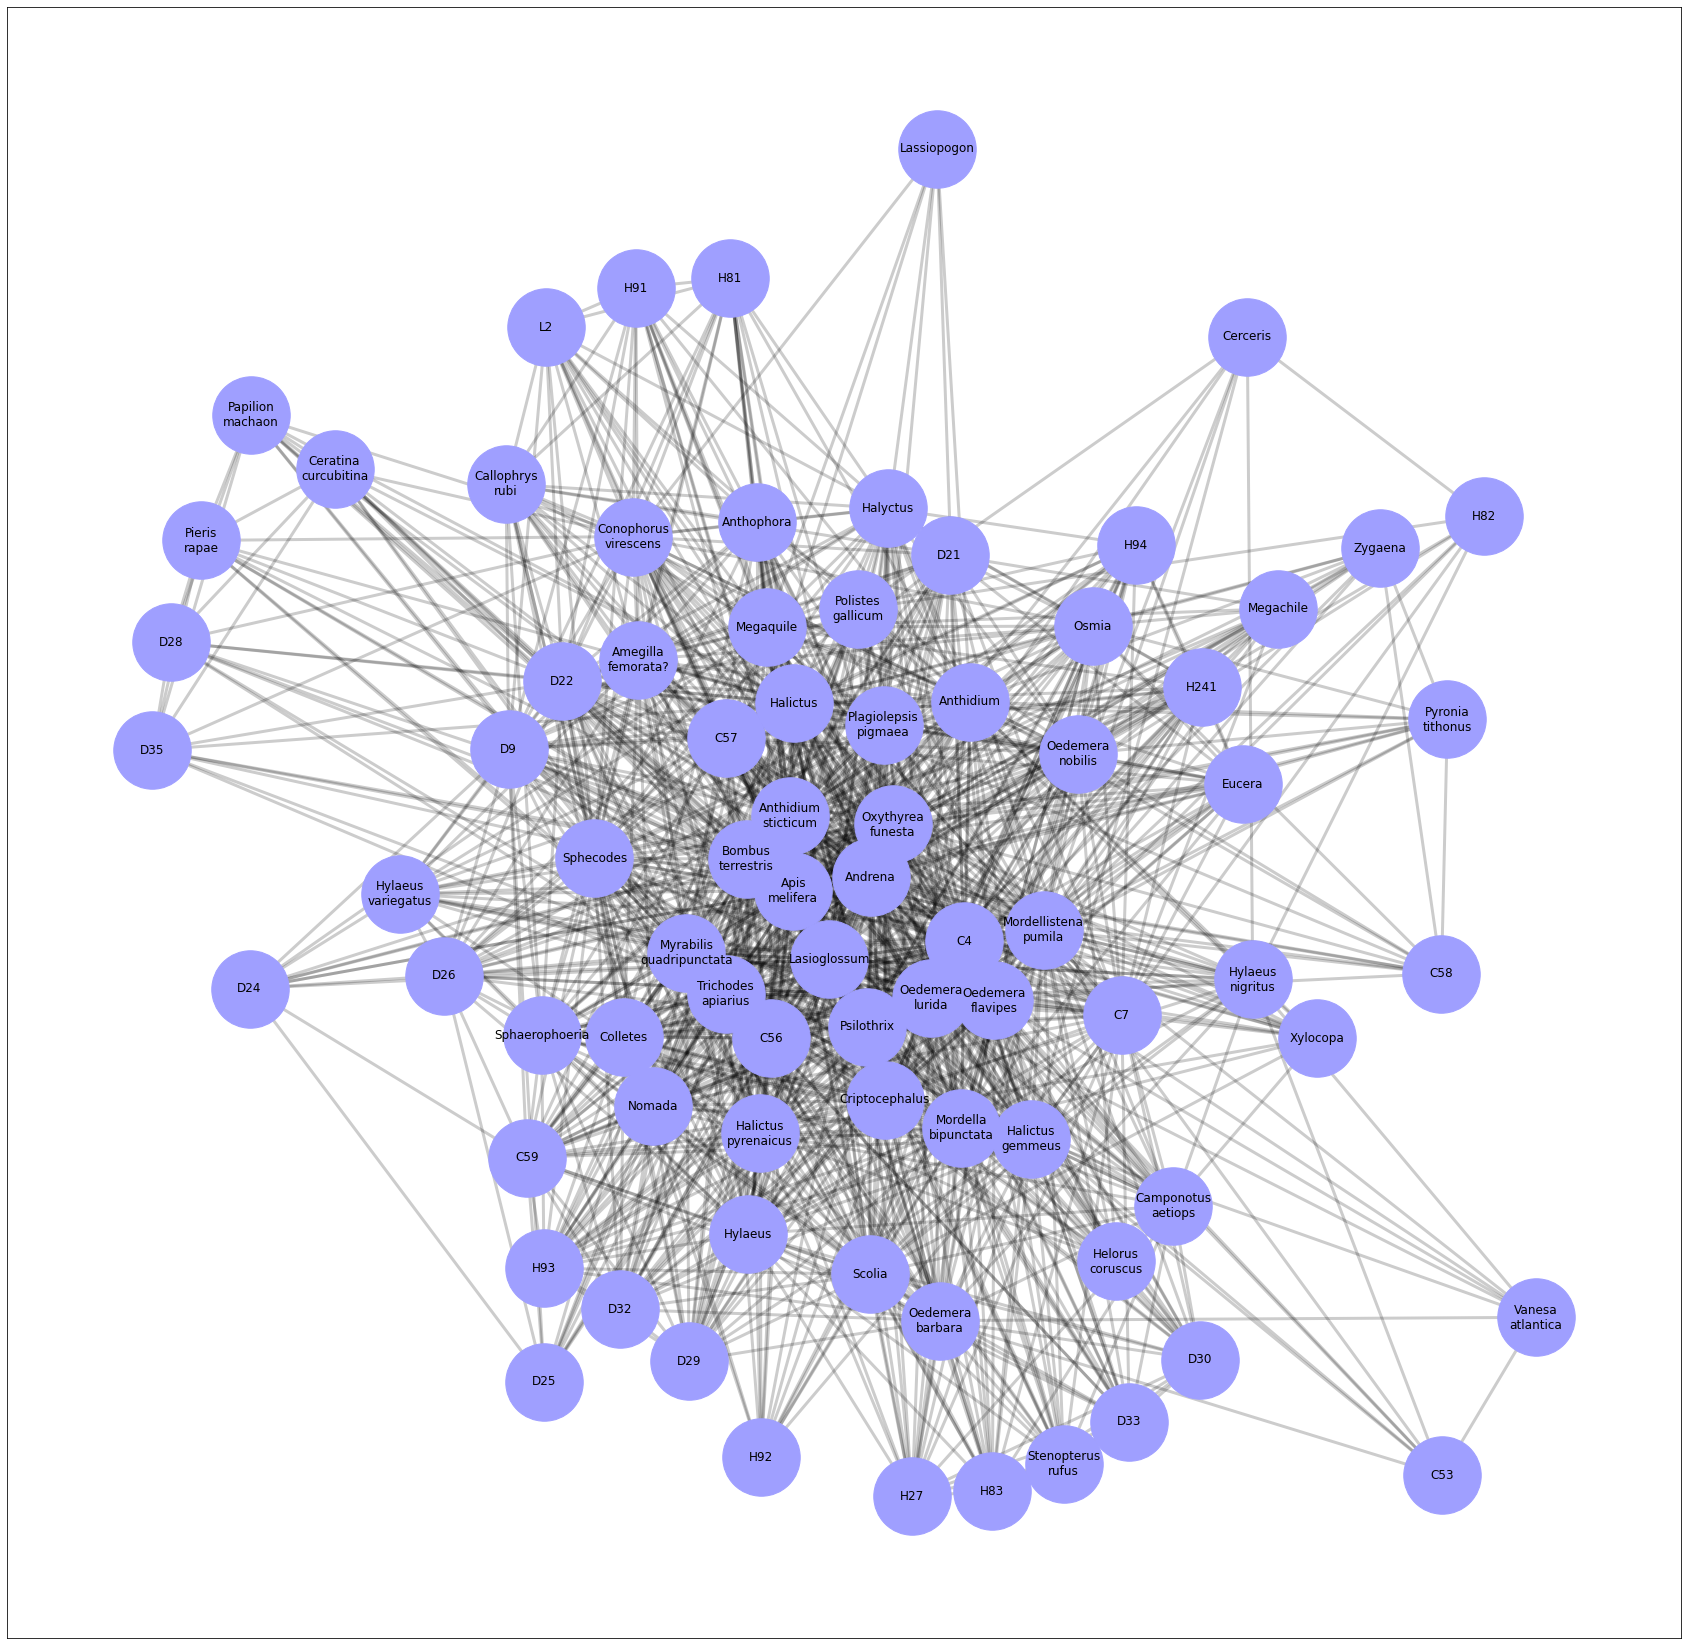

In [12]:
# Create co-affiliation network
G = bipartite.projected_graph(B, pollinators)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.3.png', dpi=150)

In [13]:
G = bipartite.weighted_projected_graph(B, plants)
list(G.edges(data=True))[0]

('Urospermum\npicrioides', 'Brassica\nfruticulosa', {'weight': 1})

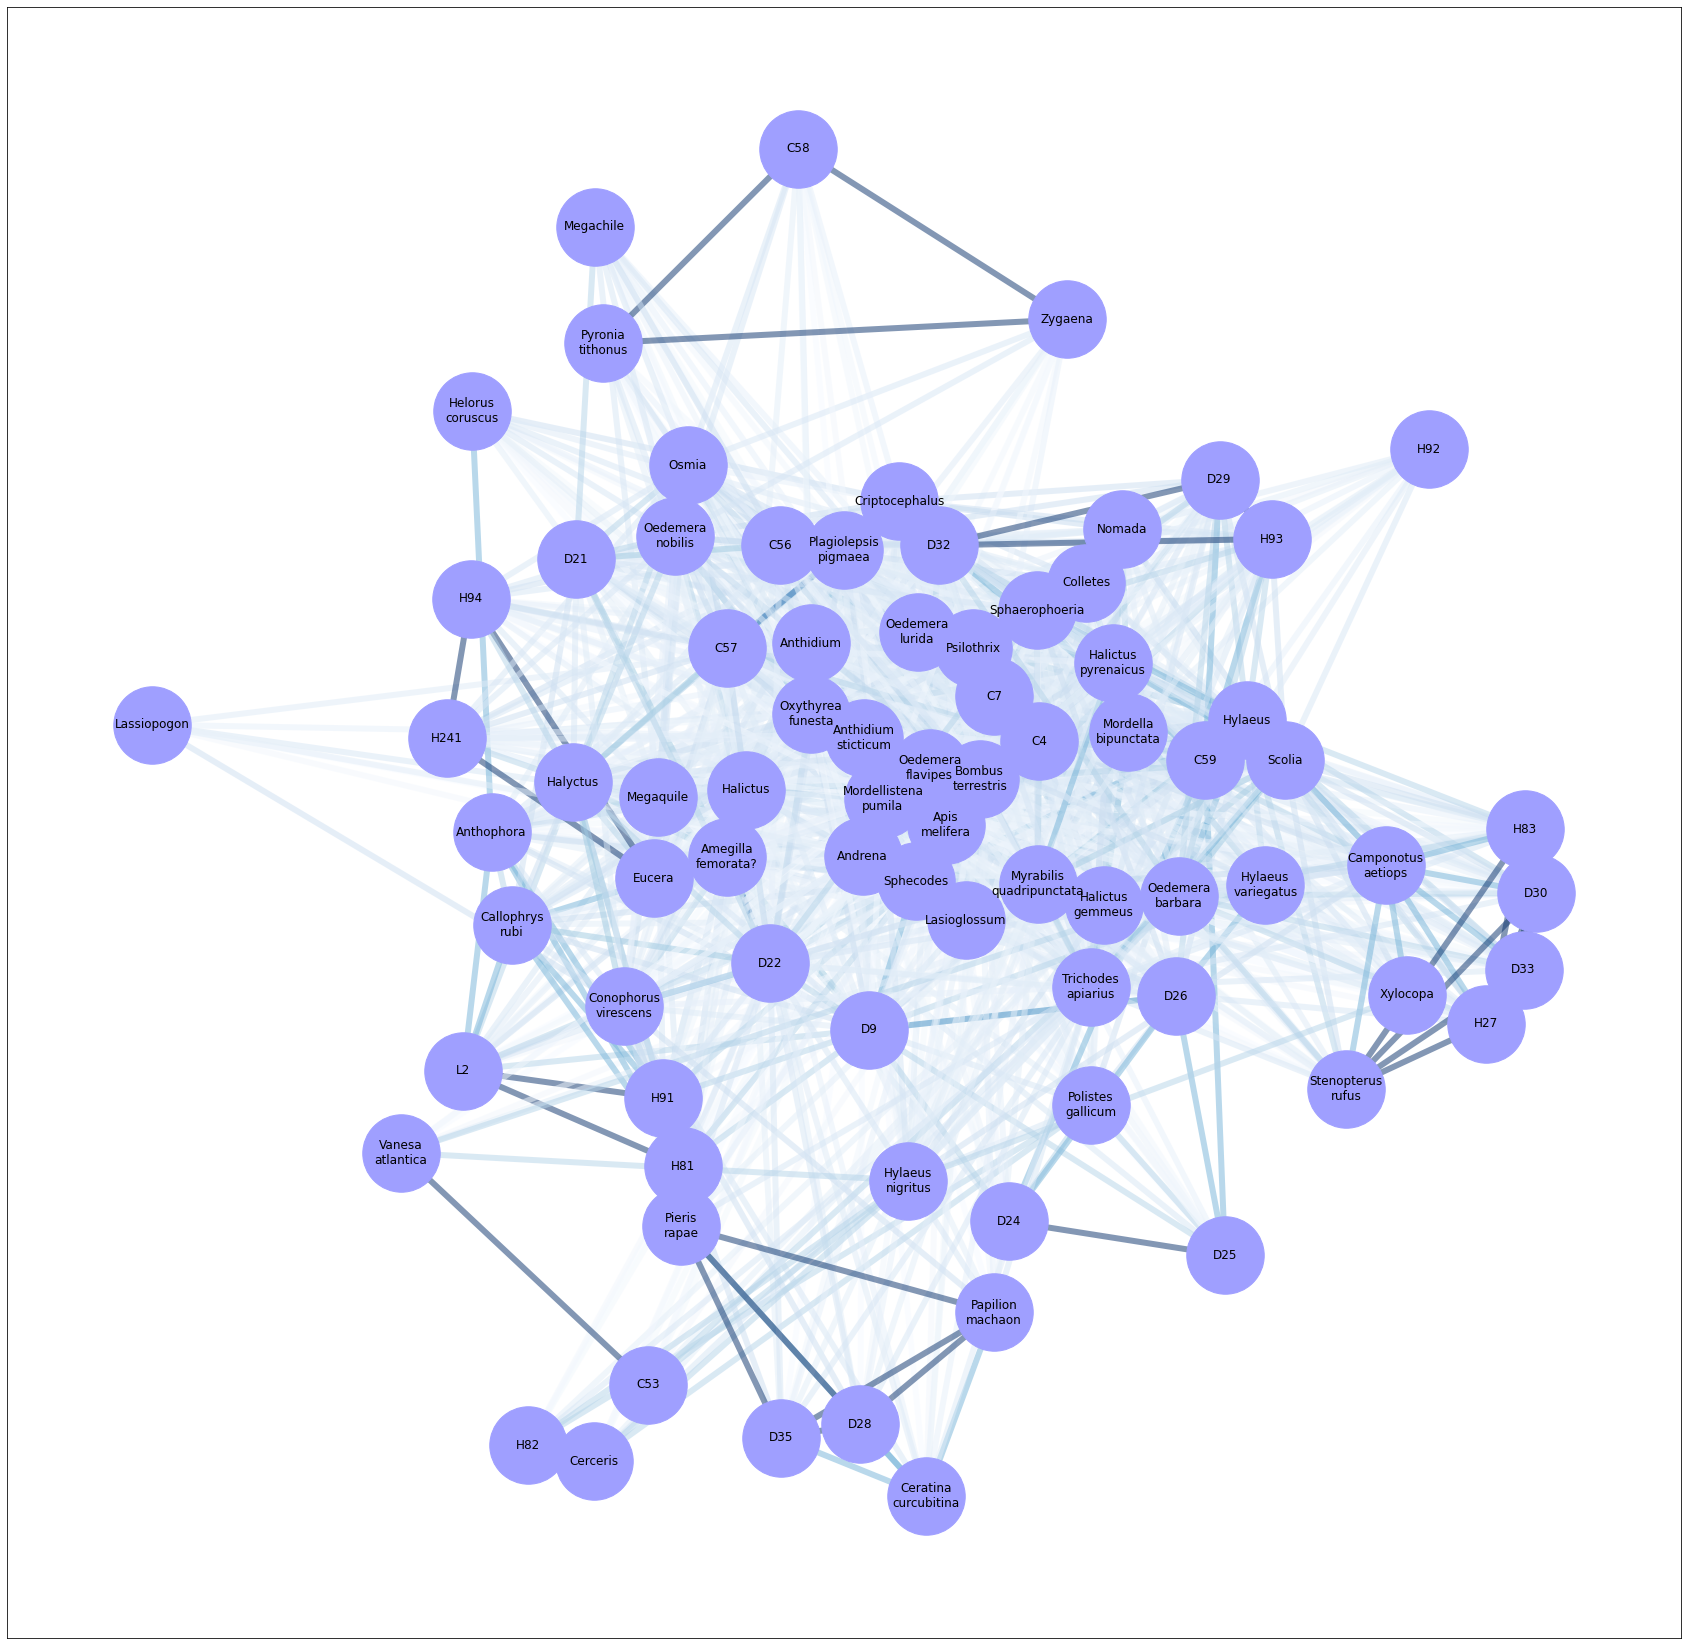

In [14]:
# Create co-affiliation network
G = bipartite.overlap_weighted_projected_graph(B, pollinators)
# Get weights
weight = [G.edges[e]['weight'] for e in G.edges]
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues, width=6, alpha=0.5)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=6000)
nx.draw_networkx_labels(G, pos)
plt.savefig('output-4.4.png', dpi=150)

Chp 5

In [21]:
import networkx as nx
import pandas as pd

# Create an empty affiliation network graph
B = nx.Graph()

# Create a set to store unique people
people = set()

# Load data from the CSV file using pandas
data_file = '50_ALL_2M.csv' 
df = pd.read_csv(data_file)

# Get event columns (excluding the 'Person' column)
event_columns = [col for col in df.columns if col != 'Person']

# Iterate through rows and add edges to the graph
for _, row in df.iterrows():
    person = row['Person']  # Replace 'Person' with the actual column name for people's names
    
    # Add the person to the set of people
    people.add(person)
    
    # Iterate through event columns and add edges with weights
    for event in event_columns:
        weight = row[event]
        if weight != 0:
            B.add_edge(person, event, weight=int(weight))

# Project into person-person co-affiliation network
G = nx.bipartite.projected_graph(B, people)


In [22]:
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 52896.53324605241),
 ('Ada Wright', 26344.263264276888),
 ('Patricia Woodlock', 24774.923422322416),
 ('Emily Duval', 19517.906214119474),
 ('Mary Leigh', 19404.22583377211),
 ('Mabel Capper', 18221.362811581763),
 ('Sylvia Pankhurst', 18127.596886368967),
 ('Elsie Evans', 15674.806298703455),
 ('Winifred Mayo', 15600.989680321363),
 ('Vera Wentworth', 13233.504078942524)]

In [23]:
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 0.11587964174472973),
 ('Caroline A Downing', 0.11437066100686198),
 ('Kitty Marion', 0.11344996012448635),
 ('Mabel Capper', 0.10991776240126287),
 ('Annie Bell', 0.10834705221110301),
 ('Grace Chappelow', 0.1081818524424996),
 ('Winifred Mayo', 0.10803831965810351),
 ('Ellen Pitfield', 0.10518714292397999),
 ('Dorothy Agnes Bowker', 0.10493919222545885),
 ('Mrs Maud Fussell', 0.10490326319130665)]

In [24]:
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 0.5357241748956739),
 ('Winifred Mayo', 0.5009438937877011),
 ('Caroline A Downing', 0.5009438937877011),
 ('Mabel Capper', 0.5006919099377073),
 ('Kitty Marion', 0.49793672684150186),
 ('Ada Wright', 0.4898501559823633),
 ('Patricia Woodlock', 0.4886477746471095),
 ('Vera Wentworth', 0.48769011119851163),
 ('Evelyn Whurry', 0.4874512815652116),
 ('Annie Bell', 0.4869743233640714)]

In [25]:
triangles = nx.triangles(G)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Maud Joachim', 19687),
 ('Caroline A Downing', 18201),
 ('Kitty Marion', 17696),
 ('Mabel Capper', 16811),
 ('Winifred Mayo', 16455),
 ('Annie Bell', 16065),
 ('Grace Chappelow', 16018),
 ('Ellen Pitfield', 14910),
 ('Mrs Maud Fussell', 14841),
 ('Dorothy Agnes Bowker', 14750)]

In [26]:
clustering = nx.clustering(G)
[(x, clustering[x]) for x in sorted(people, key=lambda x:eigenvector[x], reverse=True)[0:10]]

[('Maud Joachim', 0.23595330552759),
 ('Caroline A Downing', 0.34999903851700864),
 ('Kitty Marion', 0.3670988486671507),
 ('Mabel Capper', 0.33992518451117176),
 ('Annie Bell', 0.4233201581027668),
 ('Grace Chappelow', 0.43461037551551984),
 ('Winifred Mayo', 0.3480477177545582),
 ('Ellen Pitfield', 0.4828993392926545),
 ('Dorothy Agnes Bowker', 0.5058125578683859),
 ('Mrs Maud Fussell', 0.5006071645415908)]

Chp 6

In [27]:
# Load karate club network
G_karate = nx.karate_club_graph()
mr_hi = 0
john_a = 33